<a href="https://colab.research.google.com/github/Bornitaadhikari/WHO-Vaccination-Data-Analysis/blob/main/WHO_Vaccination_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np                       #Necessary Libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'16oxnjDxRFFvNFS8-zhEioRVpHJUUoseg'}) # replace the id with id of file you want to access
downloaded.GetContentFile('vaccination-data.csv')

In [5]:

#3.1 Read file as panda dataframe
import pandas as pd
xyz = pd.read_csv('vaccination-data.csv') 
print(xyz.head(1))

                       COUNTRY  ... NUMBER_VACCINES_TYPES_USED
0  Falkland Islands (Malvinas)  ...                        1.0

[1 rows x 14 columns]


In [6]:
vaccin_df = pd.read_csv('vaccination-data.csv')

In [7]:
vaccin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               228 non-null    object 
 1   ISO3                                  228 non-null    object 
 2   WHO_REGION                            228 non-null    object 
 3   DATA_SOURCE                           228 non-null    object 
 4   DATE_UPDATED                          228 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    int64  
 6   PERSONS_VACCINATED_1PLUS_DOSE         225 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  225 non-null    float64
 9   PERSONS_FULLY_VACCINATED              227 non-null    float64
 10  PERSONS_FULLY_VACCINATED_PER100       227 non-null    float64
 11  VACCINES_USED      

In [8]:
vaccin_df.shape

(228, 14)

In [9]:
vaccin_df

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Falkland Islands (Malvinas),FLK,AMRO,OWID,2021-04-14,4407,2632.0,126.529,75.567,1775.0,50.962,AstraZeneca - AZD1222,NaN,1.0
1,Saint Helena,SHN,AFRO,OWID,2021-05-05,7892,4361.0,129.995,71.833,3531.0,58.162,AstraZeneca - AZD1222,NaN,1.0
2,Greenland,GRL,EURO,OWID,2022-01-21,79430,41122.0,139.911,72.434,38308.0,67.477,Moderna - mRNA-1273,NaN,1.0
3,Faroe Islands,FRO,EURO,OWID,2022-01-20,101803,41607.0,208.335,85.147,40789.0,83.473,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",NaN,2.0
4,Jersey,JEY,EURO,OWID,2022-01-16,217598,81954.0,201.861,76.027,77797.0,72.171,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Luxembourg,LUX,EURO,REPORTING,2022-01-09,1089085,456893.0,173.900,72.974,397194.0,69.998,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2020-12-30,4.0
224,Norway,NOR,EURO,REPORTING,2022-01-09,10126353,4292103.0,188.700,79.963,3938769.0,73.498,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2020-12-23,4.0
225,Israel,ISR,EURO,REPORTING,2022-01-02,12870938,6635654.0,148.700,76.664,5993082.0,69.240,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2020-12-16,3.0
226,Bulgaria,BGR,EURO,REPORTING,2022-01-09,3864538,2003184.0,55.600,28.817,1475900.0,28.059,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2020-12-30,4.0


In [10]:
vaccin_df.columns

Index(['COUNTRY', 'ISO3', 'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED',
       'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'VACCINES_USED', 'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED'],
      dtype='object')

In [11]:
vaccin_df.isnull().sum().sum()

34

Data Cleaning

In [12]:
null_df = vaccin_df[vaccin_df.isna().any(axis=1)] #no  Null values 

In [13]:
null_df

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Falkland Islands (Malvinas),FLK,AMRO,OWID,2021-04-14,4407,2632.0,126.529,75.567,1775.0,50.962,AstraZeneca - AZD1222,NaN,1.0
1,Saint Helena,SHN,AFRO,OWID,2021-05-05,7892,4361.0,129.995,71.833,3531.0,58.162,AstraZeneca - AZD1222,NaN,1.0
2,Greenland,GRL,EURO,OWID,2022-01-21,79430,41122.0,139.911,72.434,38308.0,67.477,Moderna - mRNA-1273,NaN,1.0
3,Faroe Islands,FRO,EURO,OWID,2022-01-20,101803,41607.0,208.335,85.147,40789.0,83.473,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",NaN,2.0
4,Jersey,JEY,EURO,OWID,2022-01-16,217598,81954.0,201.861,76.027,77797.0,72.171,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",NaN,3.0
5,Liechtenstein,LIE,OTHER,OWID,2022-01-20,68131,26578.0,175.836,68.594,25973.0,67.032,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",NaN,2.0
6,Guernsey,GGY,EURO,OWID,2022-01-17,145112,NaN,225.092,NaN,NaN,NaN,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",NaN,3.0
7,Isle of Man,IMN,EURO,OWID,2022-01-21,184275,69098.0,216.713,81.261,66034.0,77.658,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",NaN,3.0
8,Gibraltar,GIB,EURO,OWID,2022-01-22,110437,41335.0,327.794,122.689,40666.0,120.703,Pfizer BioNTech - Comirnaty,NaN,1.0
21,Sint Eustatius,XBA,AMRO,REPORTING,2022-01-21,3110,1588.0,99.076,50.589,1522.0,48.487,NaN,NaN,NaN


Procedure For Finding Top 10 Countries

In [14]:
 vaccins_df= null_df.groupby('COUNTRY')[['TOTAL_VACCINATIONS']].mean()
 vaccins_df

,TOTAL_VACCINATIONS
COUNTRY,
Bonaire,32919.0
Bosnia and Herzegovina,1553874.0
Cuba,33275888.0
Falkland Islands (Malvinas),4407.0
Faroe Islands,101803.0
Gibraltar,110437.0
Greenland,79430.0
Guernsey,145112.0
Haiti,204902.0


In [15]:
vaccins_df['COUNTRY'] = vaccins_df.index
vaccins=vaccins_df.nlargest(n=10, columns=['TOTAL_VACCINATIONS'])
vaccins

,TOTAL_VACCINATIONS,COUNTRY
COUNTRY,,
Russian Federation,147390352.0,Russian Federation
Turkey,136281040.0,Turkey
Cuba,33275888.0,Cuba
United Arab Emirates,23313672.0,United Arab Emirates
Puerto Rico,6236594.0,Puerto Rico
Qatar,5589214.0,Qatar
Kosovo,1668010.0,Kosovo
Bosnia and Herzegovina,1553874.0,Bosnia and Herzegovina
Martinique,335224.0,Martinique


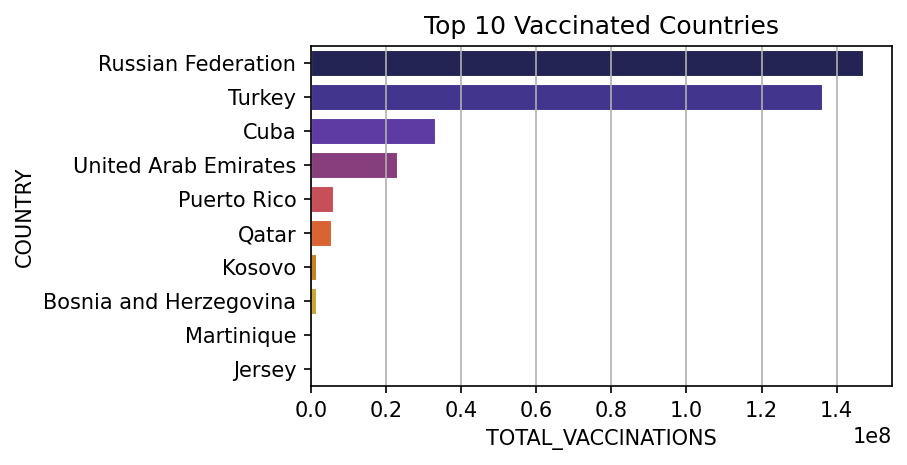

In [16]:
plt.figure(figsize=(5,3),dpi=150)
plt.grid()
sns.set_style('darkgrid',{"grid.color": ".5", "grid.linestyle": ":"})

plt.title('Top 10 Vaccinated Countries')
sns.barplot(y='COUNTRY',x='TOTAL_VACCINATIONS',palette='CMRmap',data=vaccins);

Procedure For Finding Vaccinated Countries

In [17]:
region_df=null_df.groupby('WHO_REGION')[['TOTAL_VACCINATIONS']].count()
region_df

,TOTAL_VACCINATIONS
WHO_REGION,
AFRO,1
AMRO,8
EMRO,2
EURO,10
OTHER,1


In [18]:

regions = region_df.sort_values('TOTAL_VACCINATIONS',ascending=False)

regions

,TOTAL_VACCINATIONS
WHO_REGION,
EURO,10
AMRO,8
EMRO,2
AFRO,1
OTHER,1


In [19]:
WHOregion = list(region_df.TOTAL_VACCINATIONS)
WHOregion

[1, 8, 2, 10, 1]

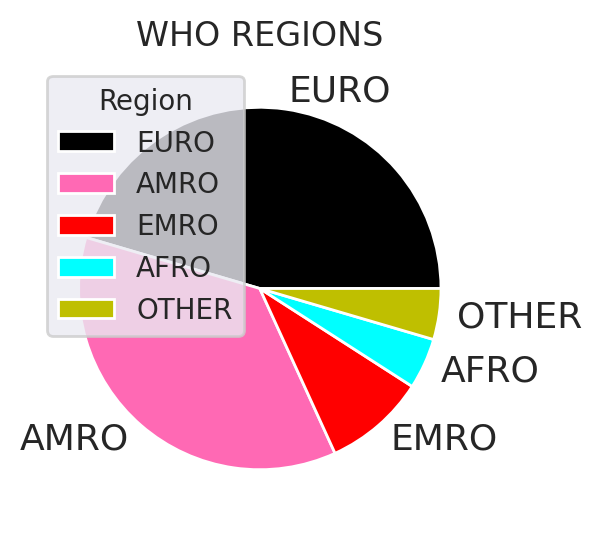

In [20]:
plt.figure(figsize=(5,3),dpi=200)
WHOregion= np.array([10,8,2,1,1])
myregions=['EURO','AMRO','EMRO','AFRO','OTHER']
mycolors=['k','hotpink','red','cyan','y']

plt.pie(WHOregion,labels=myregions,colors=mycolors,textprops={'fontsize': 13});
plt.title('WHO REGIONS')
plt.legend(title='Region')
plt.show()

In [21]:
region1=null_df.groupby('WHO_REGION')[['TOTAL_VACCINATIONS']].mean()
region1

,TOTAL_VACCINATIONS
WHO_REGION,
AFRO,7892.0
AMRO,5012024.0
EMRO,14451443.0
EURO,28773193.1
OTHER,68131.0


In [22]:
regions2=null_df.groupby('WHO_REGION')[['TOTAL_VACCINATIONS_PER100']].mean()
regions2

,TOTAL_VACCINATIONS_PER100
WHO_REGION,
AFRO,129.995000
AMRO,143.595625
EMRO,214.859500
EURO,172.260600
OTHER,175.836000


In [23]:
regions3=null_df.groupby('WHO_REGION')[['PERSONS_VACCINATED_1PLUS_DOSE']].mean()
regions3

,PERSONS_VACCINATED_1PLUS_DOSE
WHO_REGION,
AFRO,4.361000e+03
AMRO,1.725922e+06
EMRO,NaN
EURO,1.481996e+07
OTHER,2.657800e+04


In [24]:
regions4=null_df.groupby('WHO_REGION')[['PERSONS_VACCINATED_1PLUS_DOSE_PER100']].mean()
regions4

,PERSONS_VACCINATED_1PLUS_DOSE_PER100
WHO_REGION,
AFRO,71.833000
AMRO,65.975125
EMRO,NaN
EURO,70.333222
OTHER,68.594000


In [25]:
regions5=null_df.groupby('WHO_REGION')[['PERSONS_FULLY_VACCINATED']].mean()
regions5

,PERSONS_FULLY_VACCINATED
WHO_REGION,
AFRO,3.531000e+03
AMRO,1.565763e+06
EMRO,5.942750e+06
EURO,1.351744e+07
OTHER,2.597300e+04


In [26]:
regions6=null_df.groupby('WHO_REGION')[['PERSONS_FULLY_VACCINATED_PER100']].mean()
regions6

,PERSONS_FULLY_VACCINATED_PER100
WHO_REGION,
AFRO,58.162000
AMRO,58.019500
EMRO,91.299500
EURO,66.155333
OTHER,67.032000


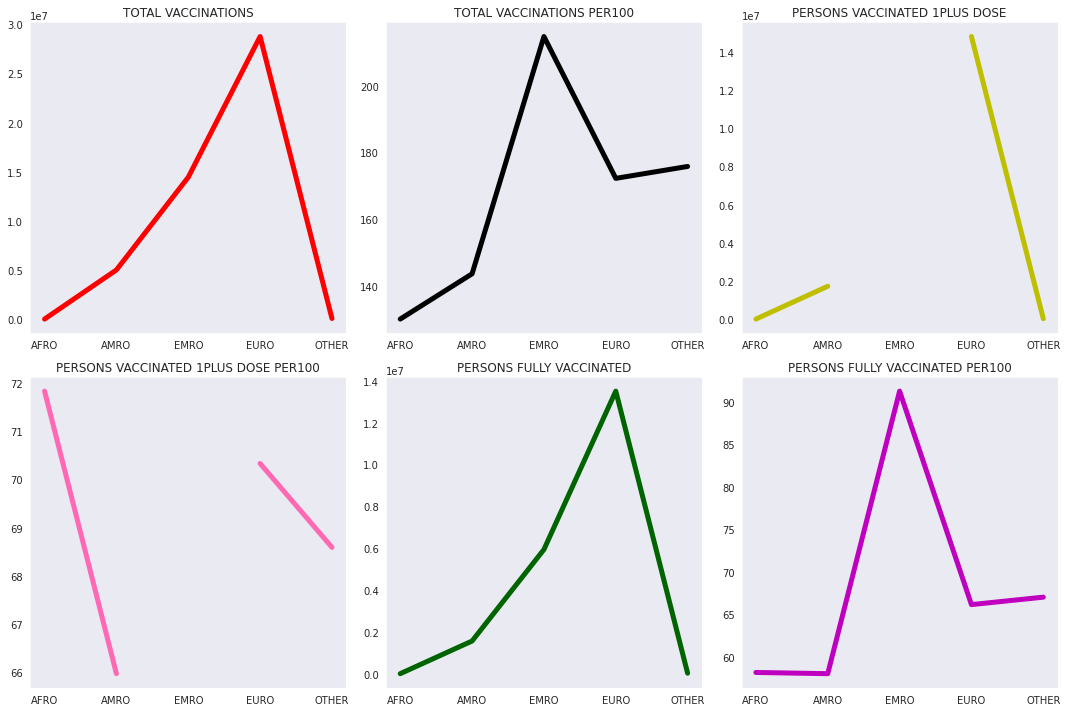

In [27]:

fig = plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title('TOTAL VACCINATIONS')
plt.grid()
fig.tight_layout()
plt.plot(region1,color='red',linewidth=5)

plt.subplot(2,3,2)
plt.title('TOTAL VACCINATIONS PER100')
plt.grid()
fig.tight_layout()
plt.plot(regions2,color='k',linewidth=5)

plt.subplot(2,3,3)
plt.title('PERSONS VACCINATED 1PLUS DOSE')
plt.grid()
fig.tight_layout()
plt.plot(regions3,color='y',linewidth=5)

plt.subplot(2,3,4)
plt.title('PERSONS VACCINATED 1PLUS DOSE PER100')
plt.grid()
fig.tight_layout()
plt.plot(regions4,color='hotpink',linewidth=5)

plt.subplot(2,3,5)
plt.title('PERSONS FULLY VACCINATED')
plt.grid()
fig.tight_layout()
plt.plot(regions5,color='darkgreen',linewidth=5)

plt.subplot(2,3,6)
plt.title('PERSONS FULLY VACCINATED PER100')
plt.grid()
fig.tight_layout()
plt.plot(regions6,color='m',linewidth=5)

In [28]:
vaccintype_df = null_df.groupby('VACCINES_USED')[['WHO_REGION']].count()
vaccintype_df
vaccintype_df['VACCINES_USED'] = vaccintype_df.index
vaccintype_df

,WHO_REGION,VACCINES_USED
VACCINES_USED,,
AstraZeneca - AZD1222,2,AstraZeneca - AZD1222
"AstraZeneca - AZD1222, Pfizer BioNTech - Comirnaty",1,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir..."
"AstraZeneca - AZD1222, Pfizer BioNTech - Comirnaty, Sinovac - CoronaVac, Gamaleya - Sputnik V",1,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir..."
"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid-Vac,Pfizer BioNTech - Comirnaty,SII - Covishield",1,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C..."
"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty",1,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S..."
"CIGB - CIGB-66,Finlay - Soberana Plus,Finlay - Soberana-02",1,"CIGB - CIGB-66,Finlay - Soberana Plus,Finlay -..."
"Janssen - Ad26.COV 2-S,Moderna - Spikevax",1,"Janssen - Ad26.COV 2-S,Moderna - Spikevax"
"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty",1,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz..."
Moderna - mRNA-1273,1,Moderna - mRNA-1273


In [29]:
null_df['vaccin_names']=null_df['VACCINES_USED'].apply(lambda x: str(x).split('-')[0])
null_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,vaccin_names
0,Falkland Islands (Malvinas),FLK,AMRO,OWID,2021-04-14,4407,2632.0,126.529,75.567,1775.0,50.962,AstraZeneca - AZD1222,NaN,1.0,AstraZeneca
1,Saint Helena,SHN,AFRO,OWID,2021-05-05,7892,4361.0,129.995,71.833,3531.0,58.162,AstraZeneca - AZD1222,NaN,1.0,AstraZeneca
2,Greenland,GRL,EURO,OWID,2022-01-21,79430,41122.0,139.911,72.434,38308.0,67.477,Moderna - mRNA-1273,NaN,1.0,Moderna
3,Faroe Islands,FRO,EURO,OWID,2022-01-20,101803,41607.0,208.335,85.147,40789.0,83.473,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",NaN,2.0,Moderna
4,Jersey,JEY,EURO,OWID,2022-01-16,217598,81954.0,201.861,76.027,77797.0,72.171,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",NaN,3.0,Moderna
5,Liechtenstein,LIE,OTHER,OWID,2022-01-20,68131,26578.0,175.836,68.594,25973.0,67.032,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",NaN,2.0,Moderna
6,Guernsey,GGY,EURO,OWID,2022-01-17,145112,NaN,225.092,NaN,NaN,NaN,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",NaN,3.0,Moderna
7,Isle of Man,IMN,EURO,OWID,2022-01-21,184275,69098.0,216.713,81.261,66034.0,77.658,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",NaN,3.0,Moderna
8,Gibraltar,GIB,EURO,OWID,2022-01-22,110437,41335.0,327.794,122.689,40666.0,120.703,Pfizer BioNTech - Comirnaty,NaN,1.0,Pfizer BioNTech
21,Sint Eustatius,XBA,AMRO,REPORTING,2022-01-21,3110,1588.0,99.076,50.589,1522.0,48.487,NaN,NaN,NaN,nan


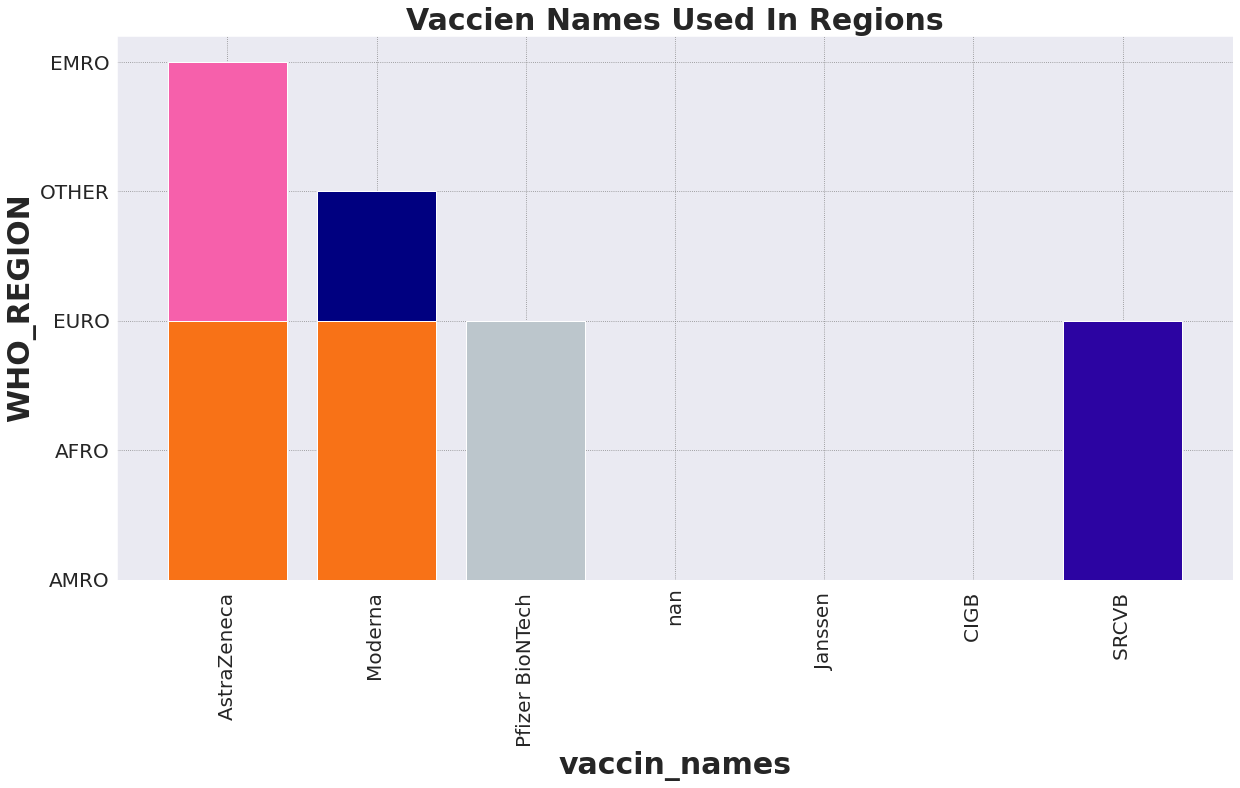

In [33]:
#Plotting Wins vs Teams
#We will be using colour code of teams jersey to make it easily understandable
plt.figure(figsize=(20,10))
plt.ylabel('WHO_REGION',fontweight='bold',fontsize=30)
plt.xlabel('vaccin_names',fontweight='bold',fontsize=30)
plt.tick_params(labelsize=20)
plt.xticks(rotation=90)
plt.title('Vaccien Names Used In Regions',fontweight='bold',fontsize=30);
plt.bar(null_df.vaccin_names, null_df.WHO_REGION, color = ['blue','#FFD801','#461B7E','#C11B17','#F660AB','#000080','#F535AA','#F87217','#BCC6CC','#2C04A2','#E04F16','#632B72']);